### Household Power Consumption

Data Preparation and Cleaning
- Load the dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip

--2024-11-23 21:50:28--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'individual+household+electric+power+consumption.zip'

     0K .......... .......... .......... .......... .......... 1.58K
    50K .......... .......                                      518 =67s

2024-11-23 22:06:51 (1.01 KB/s) - Read error at byte 69557 (Unknown error).Retrying.

--2024-11-23 22:06:52--  (try: 2)  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'individual+household+electric+power+consumption.zip'


In [2]:
# Read the text file with semicolon delimiter
data = pd.read_csv('data\household_power_consumption.txt', delimiter=';', 
                   parse_dates=[['Date', 'Time']], infer_datetime_format=True, 
                   na_values='?', low_memory=False)

# Save as CSV
# data.to_csv('household_power_consumption.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Daiyaan\AppData\Local\Temp\ipykernel_14956\2531791910.py:2: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv('data\household_power_consumption.txt', delimiter=';',
C:\Users\Daiyaan\AppData\Local\Temp\ipykernel_14956\2531791910.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('data\household_power_consumption.txt', delimiter=';',
C:\Users\Daiyaan\AppData\Local\Temp\ipykernel_14956\2531791910.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('data\household_power_consumption.txt', delimite

In [3]:
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Data Cleaning**

Convert Date_Time to a datetime object and Handle missing values.

In [4]:
# Convert to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

# Handle missing values (replace with median or drop rows)
data.fillna(data.median(), inplace=True)

In [5]:
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Exploratory Data Analysis (EDA)**          
Visualize Power Consumption

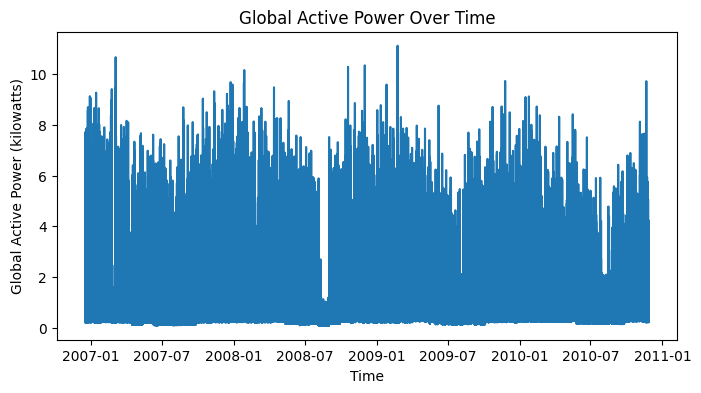

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(data['Date_Time'], data['Global_active_power'])
plt.title("Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kilowatts)")
plt.show()

**Feature Engineering**                
Extract additional features (e.g., day of the week, hour of the day).

In [10]:
data['Day_of_Week'] = data['Date_Time'].dt.dayofweek
data['Hour'] = data['Date_Time'].dt.hour

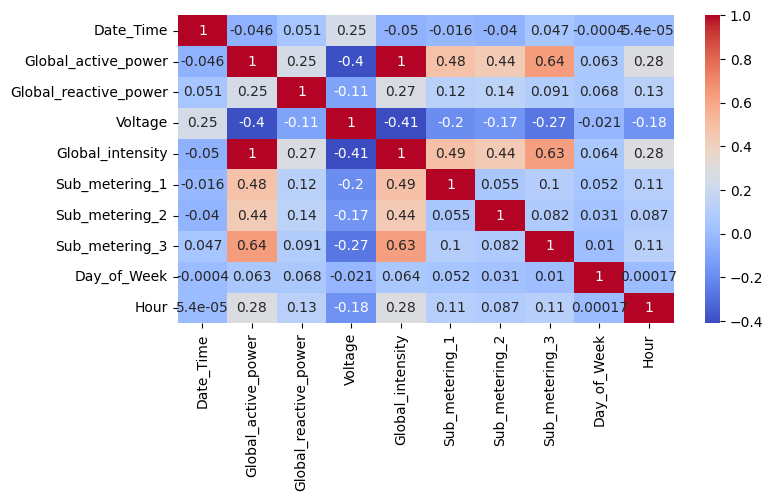

In [12]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### **Model Selection and Parameter Tuning**         
**Train-Test Split** the data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

X = data[['Day_of_Week', 'Hour']]  # Features
y = data['Global_active_power']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Model Selection** like Random Forest or Linear Regression for this task.

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Parameter Tuning**                              
Use GridSearchCV for hyperparameter tuning.

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'n_estimators': 100}


**Model Evaluation**                 
Evaluate the model performance using metrics like RMSE or MAE.

In [16]:
from sklearn.metrics import mean_absolute_error

y_pred = grid_search.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.6589596185502354
